In [29]:
import numpy as np
import mlrose_hiive as mlrose

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from datetime import datetime
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from datetime import timedelta

In [1]:
def run_ga_nn(X_train, X_test, y_train, y_test,
                hidden_node_count=70,
                learning_rate=0.1,
                max_iters=500,
              pop_size=300,
              mutation_prob=0.005,
              gtid=903789757):
    print('- - - Neural Network (Genetic Algorithm)- - -')
    ga_nn = mlrose.NeuralNetwork(
        hidden_nodes=[hidden_node_count],
        activation='relu',
        algorithm='genetic_alg',
        max_iters=max_iters,
        is_classifier =False,
        learning_rate=learning_rate,
        pop_size=pop_size,
        mutation_prob=mutation_prob,
        # max_attempts=15,
        random_state=gtid,
        curve=True,
        # early_stopping =True
    )
    begin_time=datetime.now()
    ga_nn.fit(X_train, y_train)
    end_time=datetime.now()
    print("Training Complete with time: ",end_time-begin_time)
    plot(ga_nn.fitness_curve[:,0],"Genetic Algorithm")
    print("Current Loss: ",ga_nn.loss )
    return ga_nn    
    

def run_sa_nn(X_train, X_test, y_train, y_test,
                hidden_node_count=70,
                learning_rate=0.1,
                max_iters=200000,
                gtid=903789757):
    print('- - - Neural Network (Simulated Annealing)- - -')
    sa_nn = mlrose.NeuralNetwork(
        hidden_nodes=[hidden_node_count],
        activation='relu',
        algorithm='simulated_annealing',
        max_iters=max_iters,
        is_classifier =False,
        learning_rate=learning_rate,
        # max_attempts=150,
        random_state=gtid,
        curve=True,
        # early_stopping =True
    )
    begin_time=datetime.now()
    sa_nn.fit(X_train, y_train)
    end_time=datetime.now()
    print("Training Complete with time: ",end_time-begin_time)
    print("Current Loss: ",sa_nn.loss )
    plot(sa_nn.fitness_curve[:,0],"Simulated Annealing")
    return sa_nn

def run_rhc_nn(X_train, X_test, y_train, y_test,
                hidden_node_count=70,
                learning_rate=0.1,
                max_iters=200000,
                gtid=903789757):
    print('- - - Neural Network (Random Hill Climbing)- - -')
    rhc_nn = mlrose.NeuralNetwork(
        hidden_nodes=[hidden_node_count],
        activation='relu',
        algorithm='random_hill_climb',
        max_iters=max_iters,
        is_classifier =False,
        learning_rate=learning_rate,
        # max_attempts=150,
        random_state=gtid,
        curve=True,
        restarts=10,
        # early_stopping =True
    )
    begin_time=datetime.now()
    rhc_nn.fit(X_train, y_train)
    end_time=datetime.now()
    print("Training Complete with time: ",end_time-begin_time)
    print("Current Loss: ",rhc_nn.loss )
    plot(rhc_nn.fitness_curve[:,0],"Random Hill Climbing")
    return rhc_nn


In [11]:
def fill_tail(fitness_values,count):
    current_size=len(fitness_values)
    if current_size<count:
        return np.array(list(fitness_values)+[fitness_values[-1]]*(count-current_size))
    else:
        return fitness_values


In [12]:
def generate_random_coords(num_points, x_max, y_max,gtid):
    np.random.seed(gtid)  
    coords = np.random.rand(num_points, 2) * [x_max, y_max]
    tuple_coords = [tuple(row) for row in coords]
    return tuple_coords


In [31]:
def run_problem_algorithm_ps(problem,
                          algorithm,
                        #   gtid=903789757,
                          num_runs=30,
                          max_attempts=100,
                          max_iters=1000):
    # results = []
    fitness_curves=[]
    times=[]
    fitness_curves_vals=[]
    for _ in range(num_runs):   
        begin_time=datetime.now()
        best_state, best_fitness, fitness_curve = algorithm(problem, 
                                                           max_attempts=max_attempts, 
                                                           max_iters=max_iters,
                                                           curve=True)
        end_time=datetime.now()
        total_time = end_time - begin_time
        # results.append(best_fitness)
        fitness_curves_vals.append(fitness_curve[:, 0][-1])
        times.append(total_time)
        mean_val=sum(fitness_curves_vals) / len(fitness_curves_vals)
#         print(times)
        mean_time=sum(times, timedelta()) / len(times)
    return mean_val,mean_time

In [33]:
n_list= np.arange(5,110,5)
n_list

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105])

In [34]:
algorithms = {
    'Randomized Hill Climbing': (mlrose.random_hill_climb,'red'),
    'Simulated Annealing': (mlrose.simulated_annealing,'blue'),
    'Genetic Algorithm': (mlrose.genetic_alg,'orange'),
    'MIMIC':(mlrose.mimic,'pink')
    }

In [36]:
# x_max=100
# y_max= 100
# times=[]
# fitnesses=[]
# gtid=903789757
# for n in n_list:
# #     salesman
#     print(n)
#     num_cities=n
    
#     coords_list = generate_random_coords(num_cities, x_max, y_max,gtid)
#     fitness_dists = mlrose.TravellingSales(coords=coords_list)
#     problem_TSP = mlrose.TSPOpt(n, fitness_fn=fitness_dists, maximize=False)
#     for algo_name in algorithms:
#         print(algo_name)
#         begin_time=datetime.now()   
#         algorithm,color=algorithms[algo_name]
#         fitness,timi=run_problem_algorithm_ps(problem_TSP,algorithm,num_runs=5,max_iters=200)
#         times.append(timi)
#         fitnesses.append(fitness)
    

5
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
10
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
15
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
20
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
25
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
30
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
35
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
40
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
45
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
50
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
55
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
60
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
65
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
70
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm

In [37]:
x_max=100
y_max= 100
times_500=[]
fitnesses_500=[]
gtid=903789757
for n in n_list:
#     salesman
    print(n)
    num_cities=n
    
    coords_list = generate_random_coords(num_cities, x_max, y_max,gtid)
    fitness_dists = mlrose.TravellingSales(coords=coords_list)
    problem_TSP = mlrose.TSPOpt(n, fitness_fn=fitness_dists, maximize=False)
    for algo_name in algorithms:
        print(algo_name)
        begin_time=datetime.now()   
        algorithm,color=algorithms[algo_name]
        fitness,timi=run_problem_algorithm_ps(problem_TSP,algorithm,num_runs=5,max_iters=500)
        times_500.append(timi)
        fitnesses_500.append(fitness)
    

5
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
10
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
15
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
20
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
25
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
30
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
35
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
40
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
45
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
50
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
55
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
60
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
65
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm
MIMIC
70
Randomized Hill Climbing
Simulated Annealing
Genetic Algorithm

In [38]:
result_500=fitnesses_500

In [39]:
t_500=times_500

In [48]:
rhc=[]
rhc_t=[]
sa=[]
sa_t=[]
ga=[]
ga_t=[]
mi=[]
mi_t=[]
for i in range(len(result_500)):
    t1=result_500[i]
    t2=t_500[i]
    mod4=i%4
    if mod4==0:
        rhc.append(t1)
        rhc_t.append(t2)
    elif mod4==1:
        sa.append(t1)
        sa_t.append(t2)
    elif mod4==2:
        ga.append(t1)
        ga_t.append(t2)
    elif mod4==3:
        mi.append(t1)
        mi_t.append(t2)

In [49]:
# rhc

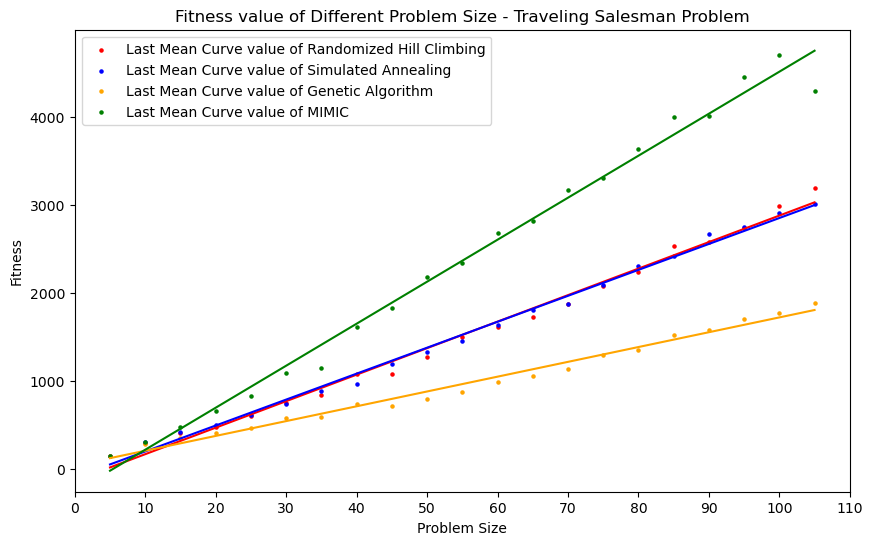

In [78]:
plt.figure(figsize=(10, 6))
plt.title('Fitness value of Different Problem Size - Traveling Salesman Problem')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.xticks(np.arange(0,120,10))
plt.scatter(n_list,rhc,color='red',label='Last Mean Curve value of Randomized Hill Climbing',s=5)
slope, intercept = np.polyfit(n_list, rhc, 1)
plt.plot(n_list, slope*n_list + intercept, color='red')

plt.scatter(n_list,sa,color='blue',label='Last Mean Curve value of Simulated Annealing',s=5)
slope, intercept = np.polyfit(n_list, sa, 1)
plt.plot(n_list, slope*n_list + intercept, color='blue')
         
plt.scatter(n_list,ga,color='orange',label='Last Mean Curve value of Genetic Algorithm',s=5)
slope, intercept = np.polyfit(n_list, ga, 1)
plt.plot(n_list, slope*n_list + intercept, color='orange')
         
plt.scatter(n_list,mi,color='green',label='Last Mean Curve value of MIMIC',s=5)
slope, intercept = np.polyfit(n_list, mi, 1)
plt.plot(n_list, slope*n_list + intercept, color='green')
plt.legend()
plt.show()

In [74]:
rhc_t=[td.total_seconds() for td in rhc_t]
sa_t=[td.total_seconds() for td in sa_t]
ga_t=[td.total_seconds() for td in ga_t]
mi_t=[td.total_seconds() for td in mi_t]



AttributeError: 'float' object has no attribute 'total_seconds'

In [75]:
ga_t

[1.75826,
 2.483779,
 4.104057,
 5.113494,
 8.067986,
 10.613905,
 15.01688,
 19.077132,
 21.078049,
 23.271985,
 25.05424,
 26.823439,
 28.826152,
 29.932874,
 31.687312,
 33.317413,
 36.09335,
 36.970938,
 39.275141,
 40.599678,
 42.210483]

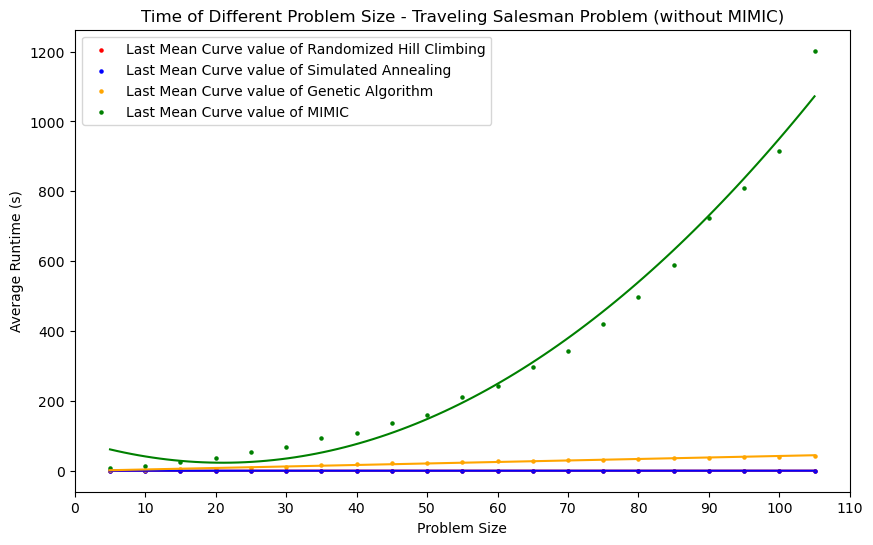

In [83]:
plt.figure(figsize=(10, 6))
plt.title('Time of Different Problem Size - Traveling Salesman Problem (without MIMIC)')
plt.xlabel('Problem Size')
plt.ylabel('Average Runtime (s)')
plt.xticks(np.arange(0,120,10))
plt.xticks(np.arange(0,120,10))
plt.scatter(n_list,rhc_t,color='red',label='Last Mean Curve value of Randomized Hill Climbing',s=5)
slope, intercept = np.polyfit(n_list, rhc_t, 1)
plt.plot(n_list, slope*n_list + intercept, color='red')

plt.scatter(n_list,sa_t,color='blue',label='Last Mean Curve value of Simulated Annealing',s=5)
slope, intercept = np.polyfit(n_list, sa_t, 1)
plt.plot(n_list, slope*n_list + intercept, color='blue')
         
plt.scatter(n_list,ga_t,color='orange',label='Last Mean Curve value of Genetic Algorithm',s=5)
slope, intercept = np.polyfit(n_list, ga_t, 1)
plt.plot(n_list, slope*n_list + intercept, color='orange')
         
plt.scatter(n_list,mi_t,color='green',label='Last Mean Curve value of MIMIC',s=5)
coefficients  = np.polyfit(n_list, mi_t, 2)
x_fit = np.linspace(5, 105, 100)
y_fit = np.polyval(coefficients, x_fit)
plt.plot(x_fit, y_fit, color='green')  

plt.legend()
plt.show()

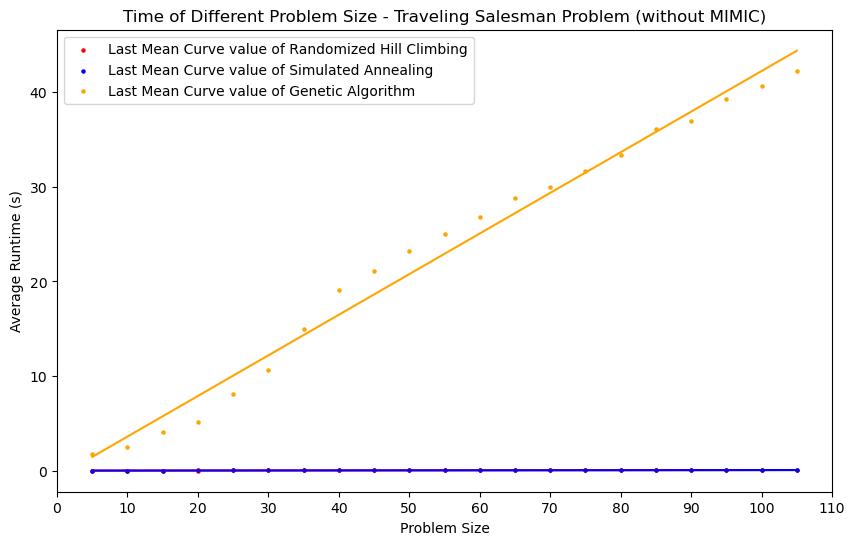

In [81]:
plt.figure(figsize=(10, 6))
plt.title('Time of Different Problem Size - Traveling Salesman Problem (without MIMIC)')
plt.xlabel('Problem Size')
plt.ylabel('Average Runtime (s)')
plt.xticks(np.arange(0,120,10))
plt.xticks(np.arange(0,120,10))
plt.scatter(n_list,rhc_t,color='red',label='Last Mean Curve value of Randomized Hill Climbing',s=5)
slope, intercept = np.polyfit(n_list, rhc_t, 1)
plt.plot(n_list, slope*n_list + intercept, color='red')

plt.scatter(n_list,sa_t,color='blue',label='Last Mean Curve value of Simulated Annealing',s=5)
slope, intercept = np.polyfit(n_list, sa_t, 1)
plt.plot(n_list, slope*n_list + intercept, color='blue')
         
plt.scatter(n_list,ga_t,color='orange',label='Last Mean Curve value of Genetic Algorithm',s=5)
slope, intercept = np.polyfit(n_list, ga_t, 1)
plt.plot(n_list, slope*n_list + intercept, color='orange')
         
# plt.scatter(n_list,mi_t,color='green',label='Last Mean Curve value of MIMIC',s=5)
# coefficients  = np.polyfit(n_list, mi_t, 2)
# x_fit = np.linspace(5, 105, 100)
# y_fit = np.polyval(coefficients, x_fit)
# plt.plot(x_fit, y_fit, color='green')  

plt.legend()
plt.show()

In [68]:
mi_t

[6.526821,
 14.035266,
 24.339056,
 36.150927,
 52.697937,
 69.162262,
 92.730773,
 109.04928,
 137.699554,
 159.239621,
 211.058677,
 243.46094,
 298.063546,
 341.614099,
 418.84768,
 498.201006,
 589.917505,
 723.307481,
 808.603535,
 914.114178,
 1202.654286]

In [ ]:

print(fitnesses)

In [82]:
# [1,2,3,4].mean()